In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("data_science_competition_2024.xls")
data.head(2)

,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default


In [5]:
data.columns = data.columns.str.strip().str.replace(" ","_").str.lower()

# Data Description

## Explanaton
* The data description process involved analyzing the key characteristics and properties of the dataset. This step aimed to gain insights into the structure, content, and statistical attributes of the data##


## Steps taken
* 1. Dataset Overview: A comprehensive overview of the dataset was generated, including the number of rows and columns, data types, and basic statistical ra**e.
* 2. Feature Analysis: Each feature or column in the dataset was analyzed to understand its data type, distribution, and potential significance in the analysis.
* 3. Statistical Summary: Descriptive statistics such as mean, median, standard deviation, and quartiles were calculated for numerical features to understand their central tendency aed dispersion.
* 4. Categorical Features: For categorical features, the frequency distribution of unique values and levels was examined to identify patterns and potential data quality.

## Impact
* comprehensive understanding of the dataset's structure and content was obtained by performing data descriptions obtained. This facilitated the identification of potential data anomalies, outliers, and insights into feature importance for subsequent analysis and #mo#delpng.

## Implementation:
* The data description process was implemented using Python's pandas library and descriptive statistical functions to generate summary statistics, visualizations, and exploratory data analysis.


In [6]:
data.describe()

,unnamed:_0,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,49999.500000,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,28867.657797,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,0.000000,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,24999.750000,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,49999.500000,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,74999.250000,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,99999.000000,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000


# Check for Columns with Missing Values

## Explanation
* During the data processing phase, a check was performed to identify columns with missing values. This step involved examining each column in the dataset to determine if there were any null or NaN (Not a Number) entries esent.#


## Steps Taken:
* 1. Column Examination: Each column in the dataset was inspected to identify any mising values .
* 2. Missing Value Detection: The presence of null or NaN entries within each column was detected using methods such as isnull(), isna().
* 3. Column Identification: Columns containing missing values were identifthe missing values for categorical features were replaced with the mode (for categorical features) to help preserve the overall distribution of the data and reduce the impact of missing values on the analti#on.

## mpact:
* By identifying columns with missing values, the data processing workflow aimed to ensure da and compleent#atmon.

# Implementation:
* The check for columns with missing values was implemented using Python'custom functions to detect and handle missing data effectively.



In [7]:
check_missing_values=data.isnull().sum()
columns_with_missing =(check_missing_values[check_missing_values>0]/data.shape[0]).reset_index()
columns_with_missing.rename(columns={'index':'column',0:'Percentage'},inplace=True)
columns_with_missing

,column,Percentage
0,country,0.00100
1,job,0.04136
2,location,0.00595


In [8]:
data.head(1)

,unnamed:_0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining_term,salary,marital_status,age.1,loan_status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default


In [10]:
## Fill missing values with mode
data['job'].fillna('Engineer',inplace=True)
data['location'].fillna('Harare',inplace=True)
data['country'].fillna('zimbabwe',inplace=True)

In [11]:
data.isnull().sum()

unnamed:_0              0
loan_id                 0
gender                  0
disbursemet_date        0
currency                0
country                 0
sex                     0
is_employed             0
job                     0
location                0
loan_amount             0
number_of_defaults      0
outstanding_balance     0
interest_rate           0
age                     0
number_of_defaults.1    0
remaining_term          0
salary                  0
marital_status          0
age.1                   0
loan_status             0
dtype: int64

In [12]:
#Removing duplicate columns
data.drop(['age.1', 'number_of_defaults.1'],axis=1,inplace=True)

In [13]:
#Removing duplicate rows
data.drop_duplicates(inplace=True)

# Correcting Spellings for Entries

## Explanation:
* During the data processing phase, it was observed that there were misspelled or incorrectly entered values in certain entries. To ensure data consistency and accuracy, a spell checking and correction process was implemented for these entries

## Steps Taken:
* 1. Spell Checking:manual spell checking was performed by reviewing the unique values in the columns to identify and flag potential misspellings. This involved manually comparing the unique entries against a reference of valid words to identify and correct any misspelled entrie.*
* 2. Correction: Implemented a spell correction mechanism to automatically correct the identified misspelled entries based on the closest matching words or using predefined correction rule*.*
* 3. Manual Review: Conducted a manual review of the corrected entries to validate and ensure the accuracy of the speings.

## Impact:
* By correcting the spellings for the entries, the data quality and integrity were improved, leading to more reliable and consistent analysis and model#lt#s.

## Implementation:
* The spell checking and correction process was implemenlthe corrected datasetthen used for further analysis, modeling, or reporting purposes.


In [14]:
data['country'] = data['country'].str.lower()
repl = {'zim':'zimbabwe'}
data['country'] = data['country'].replace(repl)

In [15]:

corrections={'Data Scintist':'Data Scientist','SoftwareDeveloper':'Software Developer'}
data['job']=data['job'].replace(corrections)
             

### check correlation

# Correlation Check on Numerical Features

## Explanation:
* A correlation check was performed to analyze the relationships between numerical features in the dataset. This step aimed to identify the strength and direction of linear relationships between pairs of numerical variables.

## Steps Taken:
* 1. Correlation Calculation: Pairwise correlation coefficients (e.g., Pearson, Spearman) were computed to quantify the degree of association between numerical features.
* 2. Correlation Matrix: A correlation matrix was generated to visualize the correlation coefficients between all pairs of numerical features, providing a comprehensive overview of the relationships within the dataset.
* 3. Correlation Analysis: The correlation coefficients were interpreted to determine the strength and direction of relationships (positive or negative) between numerical features.

## Impact:
* By conducting a correlation check, insights into the interdependencies and potential multicollinearity among numerical features were obtained. This facilitated the identification of influential variables and informed feature selection for modeling tasks.

## Implementation:
* The correlation check was implemented using Python's pandas and NumPy libraries to calculate correlation coefficients and generate correlation matrices. Visualization tools such as heatmaps were utilized to present the correlation results effectively.


In [16]:
check_corr=(data.select_dtypes(include=['float','int'])).corr()
check_corr

,unnamed:_0,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,salary
unnamed:_0,1.000000,0.002319,0.002012,0.005130,-0.002702,0.001324,0.003533
loan_amount,0.002319,1.000000,-0.020298,0.556317,0.224580,0.018168,0.543407
number_of_defaults,0.002012,-0.020298,1.000000,-0.016390,-0.031063,-0.027099,-0.010592
outstanding_balance,0.005130,0.556317,-0.016390,1.000000,0.148568,0.018599,0.338373
interest_rate,-0.002702,0.224580,-0.031063,0.148568,1.000000,0.048199,0.234322
age,0.001324,0.018168,-0.027099,0.018599,0.048199,1.000000,-0.202870
salary,0.003533,0.543407,-0.010592,0.338373,0.234322,-0.202870,1.000000


#### Convert date column to datetime

# Convert Date Column to Datetime

## Explanation
* The date column in the data(disbursemet_date)set was converted to datetime format to enable efficient date-based operations and analysis. This step aimed to ensure consistency in date handling and facilitate temporal data exploration.

## Steps Taken:
* 1. Data Conversion: The date column was transformed from its original data type to the datetime data type using Python's datetime conversion functionns.
* 2. Format Standardization: The date format was standardized to a consistent str (e.g., YYY-MM-DD) to ensure uniformity and accuracy in date representation.
* 3. Error Handling: Any potential errors or inconsistencies in the date values were addressed during the conversion process to maintain data integrity.

## Impact:
* By converting the date column to datetime, the dataset became equipped for tempordifferences. This facilitated more robust and accurate analysis of temporal trends and patterns in t#h#e dala.

## Impelementation:
* The date column conversion to datetime was implemented using Python's pandas library and datetime conversion functions to ensure seamless handling of date-related operations and computations.


In [17]:
data['disbursemet_date']  = pd.to_datetime(data['disbursemet_date'],errors='coerce')

In [18]:
data['disbursemet_year'] = data['disbursemet_date'].dt.year
data['disbursemet_month'] = data['disbursemet_date'].dt.month
data['disbursemet_day'] = data['disbursemet_date'].dt.day

In [19]:
data.head(1)

,unnamed:_0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,disbursemet_year,disbursemet_month,disbursemet_day
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022-10-29,USD,zimbabwe,female,True,Teacher,Beitbridge,...,48653.011473,0.22,37,47,3230.038869,married,Did not default,2022,10,29


# Counts for Loan Status and Gender

## Explanation:
* Counts for loan status and gender were computed to provide a comprehensive overview of the distribution of these categorical variables within the dataset. This step aimed to understand the frequency and proportion of different loan statuses and gender categories.

## Steps Taken:
* 1. Loan Status Counts: The number of occurrences for each loan status category (defaulted or did not default) was calculated to assess the distribution of loan outcomes.
* 2. Gender Counts: The frequency of each gender category ( male, female, other) was determined to understand the gender composition within the dataset.

## Impact:
* By performing counts for loan status and gender, insights into the distribution and imbalance of these categorical variables were obtained. This facilitated an understanding of the representation of loan outcomes and gender diversity within the dataset.

## Implementation:
* The counts for loan status and gender were implemented using Python's pandas library to generate frequency tables and value counts for the respective categorical variables.



In [20]:
data['loan_status'].value_counts()

loan_status
Did not default    85134
Defaulted          14866
Name: count, dtype: int64

In [21]:
loan_status = {'Did not default':0,'Defaulted':1}
data['loan_status'] = data['loan_status'].map(loan_status)

In [22]:
default_loan_vs_not_default=data['loan_status'].value_counts()
default_loan_vs_not_default

loan_status
0    85134
1    14866
Name: count, dtype: int64

85134 not default loan and 14866 defaulted loan

In [23]:
data.head(1)

,unnamed:_0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,disbursemet_year,disbursemet_month,disbursemet_day
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022-10-29,USD,zimbabwe,female,True,Teacher,Beitbridge,...,48653.011473,0.22,37,47,3230.038869,married,0,2022,10,29


In [24]:
data.columns

Index(['unnamed:_0', 'loan_id', 'gender', 'disbursemet_date', 'currency',
       'country', 'sex', 'is_employed', 'job', 'location', 'loan_amount',
       'number_of_defaults', 'outstanding_balance', 'interest_rate', 'age',
       'remaining_term', 'salary', 'marital_status', 'loan_status',
       'disbursemet_year', 'disbursemet_month', 'disbursemet_day'],
      dtype='object')

In [25]:
data['remaining_term'].str.split('_').str.get(0)

0        47
1        62
2        57
3        42
4        45
         ..
99995    29
99996    57
99997    53
99998    59
99999    47
Name: remaining_term, Length: 100000, dtype: object

In [26]:
data['remaining_term'] = data['remaining_term'].str.split('_').str.get(0)

In [27]:
data['remaining_term'] = pd.to_numeric(data['remaining_term'],errors='coerce')

In [28]:
data.select_dtypes(include='object').columns

Index(['loan_id', 'gender', 'currency', 'country', 'sex', 'job', 'location',
       'marital_status'],
      dtype='object')

In [29]:
data['sex'].value_counts()

sex
male      35028
female    32685
other     32287
Name: count, dtype: int64

In [30]:
data['gender'].value_counts()

gender
male      35028
female    32685
other     32287
Name: count, dtype: int64

# DISTRIBUTION OF NUMERICAL FEATURES


## Dataset Exploration:
* The dataset was explored to gain insights into feature distributions, correlations, and potential patterns. The following steps were undertaken to analyze the data:

## Histograms of Numerical Features:
* Histograms were plotted to visualize the distributions of numerical features, including loan_amount, outstanding balance, interest rate, age, and remaining term. This allowed for the examination of the frequency and spread of values within each numerical variable, providing insights into their distributional characteristics.

# Scatter Plot with Loan Status Legend:
* A scatter plot was generated to show the relationship between loan amount and outstanding balance, with loan status represented as the legend. This visualization allowed for the examination of potential patterns or trends in the relationship between loan amount, outstanding balance, and loan status, providing insights into the distribution of loan defaults across different values of loan amount and outstanding balance.

## Observations:
* The histograms revealed the distributional characteristics of numerical features, showcasing their spread and frequency of occurrence.
* The scatter plot with loan status as the legend demonstrated the relationship between loan amount, outstanding balance, and loan status, offering insights into the distribution of loan defaults across different values of loan amount and outstanding balance.

## Conclusion:
* The EDA process provided valuable insights into the dataset, including feature distributions, key relationships, and potential predictors of loan default. These findings will inform the development of a predictive model to estimate the probability of default on loans, contributing to risk management and strategic planning in the financial domain.


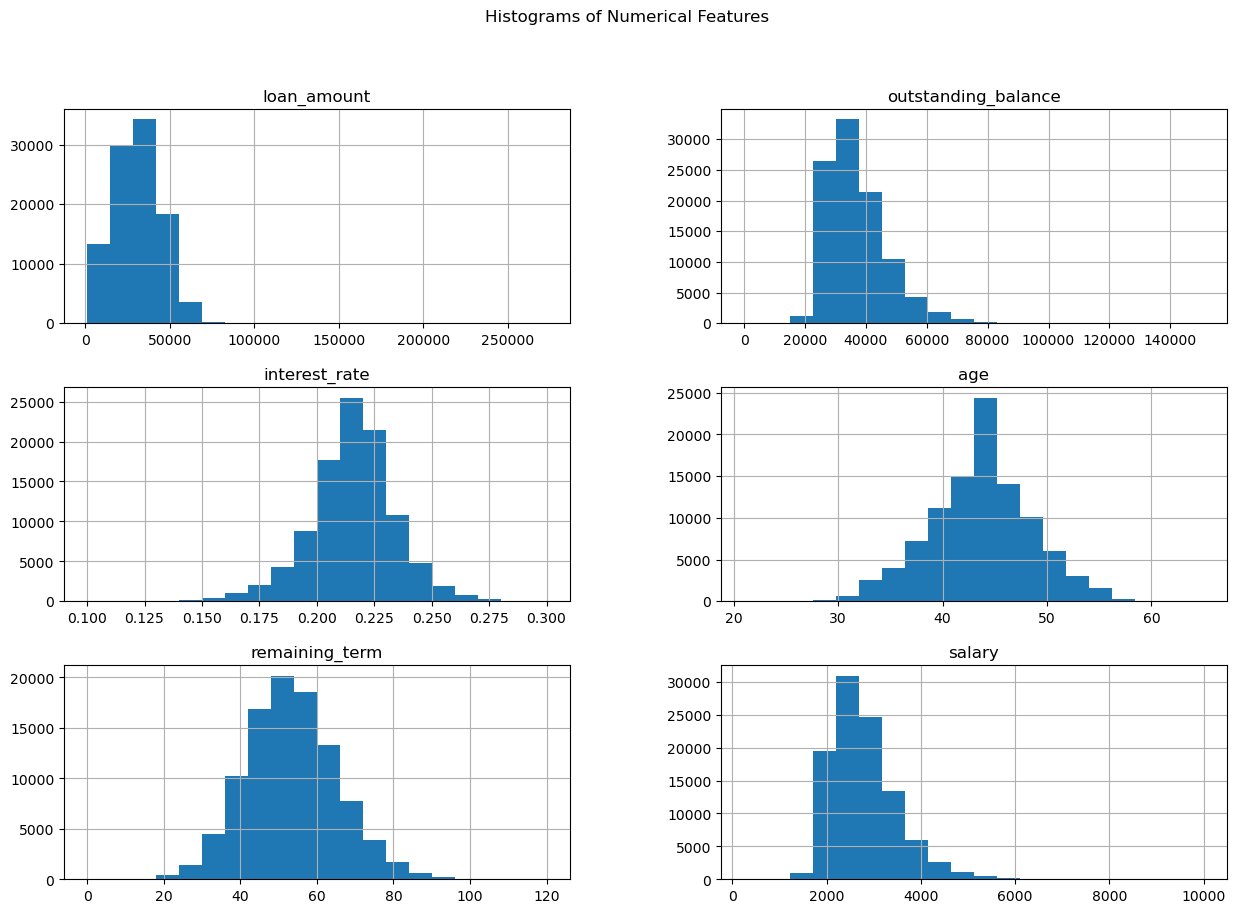

In [31]:
# Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['loan_amount', 'outstanding_balance', 'interest_rate', 'age', 'remaining_term', 'salary']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()




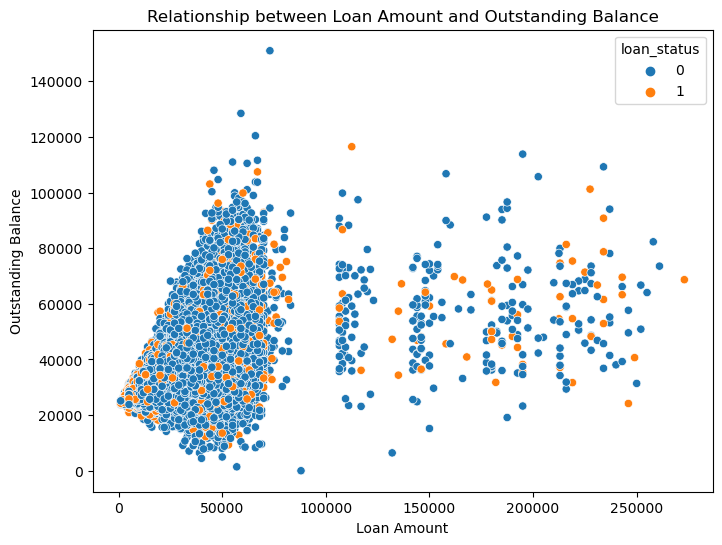

In [32]:
# Visualize relationships between features
# Relationship between loan_amount and outstanding_balance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='loan_amount', y='outstanding_balance', hue='loan_status')
plt.title('Relationship between Loan Amount and Outstanding Balance')
plt.xlabel('Loan Amount')
plt.ylabel('Outstanding Balance')
plt.show()


### Encoding Categorical Values

# Data Preprocessing and Correlation Analysis Summary

## Data Encoding:
* Categorical data such as gender, job, location, and marital status were encoded to convert them into numerical format. This preprocessing step was essential for including categorical variables in the correlation analysis and predictive modeling process.

## Correlation Matrix against Loan Status:
* After encoding the categorical data, a correlation matrix was computed to assess the relationships between all features, including both numerical and encoded categorical variables, against the target variable "loan status." This analysis provided insights into the potential associations between all input features and the loan status outcomes, helping to identify potential predictors of loan default and their strength of association.

## Conclusion:
* The encoding of categorical data and the subsequent correlation analysis against loan status have provided valuable insights into the relationships between all input features and the target variable. These findings will be instrumental in the development of a predictive model to estimate the probability of default on loans, contributing to risk management and strategic planning in the financial domain.


In [33]:
#default rate
data['default_rate'] = data.loc[:,'number_of_defaults'] /data.loc[:,'loan_amount']

In [34]:
#loan_to_value_ratio
data['loan_to_value_ratio'] = data.loc[:,'outstanding_balance'] /data.loc[:,'loan_amount']

In [35]:
data.head(5)

,unnamed:_0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,age,remaining_term,salary,marital_status,loan_status,disbursemet_year,disbursemet_month,disbursemet_day,default_rate,loan_to_value_ratio
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022-10-29,USD,zimbabwe,female,True,Teacher,Beitbridge,...,37,47,3230.038869,married,0,2022,10,29,0.000000,1.247513
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020-06-06,USD,zimbabwe,other,True,Teacher,Harare,...,43,62,3194.139103,single,0,2020,6,6,0.000074,1.064891
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023-09-29,USD,zimbabwe,other,True,Nurse,Gweru,...,43,57,3330.826656,married,0,2023,9,29,0.000029,1.279930
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022-06-22,USD,zimbabwe,female,True,Doctor,Rusape,...,47,42,2246.797020,divorced,0,2022,6,22,0.000000,1.486729
4,4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023-02-08,USD,zimbabwe,male,True,Nurse,Chipinge,...,42,45,2310.858441,married,0,2023,2,8,0.000000,1.797687


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['location'] = label_encoder.fit_transform(data['location'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['job'] = label_encoder.fit_transform(data['job'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])
data['is_employed'] = label_encoder.fit_transform(data['is_employed'])


In [37]:
data.drop(['sex','loan_id','currency','country'],axis=1,inplace=True)

In [38]:
import pandas as pd
import numpy as np


correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)
print(correlation_with_target )


loan_status            1.000000
default_rate           0.203585
loan_to_value_ratio    0.197251
number_of_defaults     0.153259
location               0.049479
gender                 0.042203
disbursemet_year       0.002693
disbursemet_date       0.001959
remaining_term         0.001119
unnamed:_0             0.000421
disbursemet_month     -0.002315
disbursemet_day       -0.003647
job                   -0.013857
is_employed           -0.031783
marital_status        -0.065132
outstanding_balance   -0.093900
salary                -0.105489
loan_amount           -0.137082
age                   -0.176039
interest_rate         -0.207767
Name: loan_status, dtype: float64


In [39]:
#data.drop(['job', 'location', 'marital_status'],axis=1,inplace=True)

In [40]:
#encoding_columns =data['gender', 'currency', 'country', 'sex', 'job', 'location', 'marital_status']

In [41]:
#data = pd.concat([data,encoding_columns],axis=1)
#data.head(1)

## Converting employment status to numeric format
*The "is employed" column was converted to numeric format using the pd.to_numeric() function with the errors parameter set to 'coerce'. This conversion process was essential for transforming the categorical employment status into a numerical format, enabling further numerical analysis and visualization of employment characteristics within the dataset.

##Count Analysis for Is_Employed:
* After converting the "is employed" column to numeric format, the counts for different employment status categories were computed. This analysis provided insights into the distribution of employment status within the dataset, including the number of employed and unemployed individuals, which is crucial for understanding the employment characteristics and potential impact on loan default outcomes.


In [42]:
#values = {'True':1,'False':0}
#data['is_employed'] = data['is_employed'].map(values)
data['is_employed'] = pd.to_numeric(data['is_employed'],errors='coerce')

In [43]:
data['is_employed'].value_counts()

is_employed
1    95864
0     4136
Name: count, dtype: int64

In [44]:
data['is_employed'].value_counts()

is_employed
1    95864
0     4136
Name: count, dtype: int64

In [45]:
data.isnull().sum()

unnamed:_0             0
gender                 0
disbursemet_date       0
is_employed            0
job                    0
location               0
loan_amount            0
number_of_defaults     0
outstanding_balance    0
interest_rate          0
age                    0
remaining_term         0
salary                 0
marital_status         0
loan_status            0
disbursemet_year       0
disbursemet_month      0
disbursemet_day        0
default_rate           0
loan_to_value_ratio    0
dtype: int64

In [46]:
data.head(1)

,unnamed:_0,gender,disbursemet_date,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining_term,salary,marital_status,loan_status,disbursemet_year,disbursemet_month,disbursemet_day,default_rate,loan_to_value_ratio
0,0,0,2022-10-29,1,8,89,39000.0,0,48653.011473,0.22,37,47,3230.038869,2,0,2022,10,29,0.0,1.247513


In [47]:
data['loan_status'].value_counts()

loan_status
0    85134
1    14866
Name: count, dtype: int64

# Feature Selection and Scaling Summary

## Feature Selection with Lasso:
* Lasso feature selection was utilized to select relevant features for model training. Lasso, a type of regularization technique, is effective in reducing the number of features by shrinking the less important features' coefficients to zero. By applying Lasso feature selection, we were able to identify the most impactful features for predicting the probability of loan default. The selected features were deemed to have a significant influence on loan default prediction based on the Lasso regularization process, which helps in mitigating overfitting and improving model interpretability.

## Feature Scaling with StandardScaler:
* After selecting the relevant features using Lasso, the features were scaled using the StandardScaler method. StandardScaler was applied to ensure that all input features have a mean of 0 and a standard deviation of 1. This scaling process is crucial for standardizing the range of features, preventing any particular feature from dominating the model training process due to its original magnitude. Additionally, StandardScaler helps in improving the convergence of optimization algorithms and enhances the performance of models that rely on distance-based metrics or regularization.

## Conclusion:
* The feature selection process involved Lasso regularization to identify the most impactful features for model training, followed by feature scaling using StandardScaler to standardize the feature ranges. These steps were essential for improving the predictive model's performance, interpretability, and generalization to new data.


In [48]:
X = data.drop(['disbursemet_date','loan_status'],axis=1)
y = data['loan_status']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [50]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((67000, 18), (33000, 18), (67000,), (33000,))

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 
lasso.fit(X, y)
selected_features_lasso = lasso.coef_ != 0
print(selected_features_lasso)

[ True False False False  True  True False  True False  True  True  True
 False False False False False False]


In [52]:
data.columns

Index(['unnamed:_0', 'gender', 'disbursemet_date', 'is_employed', 'job',
       'location', 'loan_amount', 'number_of_defaults', 'outstanding_balance',
       'interest_rate', 'age', 'remaining_term', 'salary', 'marital_status',
       'loan_status', 'disbursemet_year', 'disbursemet_month',
       'disbursemet_day', 'default_rate', 'loan_to_value_ratio'],
      dtype='object')

In [53]:
X = data[['gender', 'is_employed', 'location', 'loan_amount', 'number_of_defaults', 
        'outstanding_balance', 'interest_rate', 'age', 'remaining_term']]

Y = data['loan_status']

In [54]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [56]:
random = RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred = random.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
32995,1
32996,0
32997,0
32998,0


In [59]:
from sklearn import metrics


def evaluation(y_test, y_pred):
    return {
        'area_under_curve':metrics.roc_auc_score(y_test,y_pred),
        "accuracy": metrics.accuracy_score(y_test, y_pred),
        "recall": metrics.recall_score(y_test, y_pred),
        "precision": metrics.precision_score(y_test, y_pred),
        "f1_score": metrics.f1_score(y_test, y_pred),
    }

In [60]:
evaluation(y_train, random.predict(x_train))

{'area_under_curve': 1.0,
 'accuracy': 1.0,
 'recall': 1.0,
 'precision': 1.0,
 'f1_score': 1.0}

### Model Building 

# Model Training and Hyperparameter Tuning:
* To address the problem statement, a variety of machine learning models were trained. The models included RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, LogisticRegression, KNeighborsClassifier, SVC (Support Vector Machine), and XGBClassifier. Hyperparameter tuning is crucial for optimizing the performance of these models by finding the best set of hyperparameters that maximize their predictive capabilities.


In [61]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


models = {
    "random_forest": RandomForestClassifier(),
    "adaboost": AdaBoostClassifier(),
    "extra_trees": ExtraTreesClassifier(),
    "gradient_boosting": GradientBoostingClassifier(),
    "logistic_regression": LogisticRegression(max_iter=1000),
    "k_nearest_neighbors": KNeighborsClassifier(),
    "support_vector_machine": SVC(),
    "xgboost": xgboost.XGBClassifier(),
}

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Cross-Validation:
* To assess the performance of the trained models, cross-validation was performed using the F1 AUC-ROC method. This method combines the F1 score, which considers both precision and recall, with the AUC-ROC, providing a comprehensive evaluation of the models' predictive capabilities. By leveraging the F1 AUC-ROC cross-validation method, we aim to determine the models' effectiveness in estimating the probability of loan default and identify the most suitable model for risk management and strategic planning in the context of loan defaults.

## Conclusion:
* The trained models, along with the results from cross-validation using the F1 AUC-ROC method, provide valuable insights into their predictive performance for estimating the probability of loan default. By evaluating a diverse set of models and leveraging the F1 AUC-ROC cross-validation method, we aim to develop robust and accurate predictive models that can assist financial institutions in managing the risks associated with loan defaults and informing strategic decision-making.


In [64]:
from sklearn.model_selection import cross_validate
from joblib import Parallel, delayed

# Define the function to calculate the area under the curve for each model
def calculate_auc(model_name, model, x_train, y_train):
    auc = cross_validate(model, x_train, y_train, cv=5, scoring="roc_auc")
    return model_name, auc["test_score"].mean()

# Create a list of delayed evaluation functions for each model
tasks = [delayed(calculate_auc)(model_name, model, x_train, y_train) for model_name, model in models.items()]

# Execute the tasks in parallel using multiple cores
results = Parallel(n_jobs=-1)(tasks)

# Create a DataFrame with the results
area_under_curve = pd.DataFrame({model_name: mean_auc for model_name, mean_auc in results}, index=['f1_scores']).T

# Print the DataFrame
print(area_under_curve)

                        f1_scores
random_forest            0.847105
adaboost                 0.811782
extra_trees              0.840634
gradient_boosting        0.854988
logistic_regression      0.656316
k_nearest_neighbors      0.576837
support_vector_machine   0.592634
xgboost                  0.865454


# Hyperparameter Tuning:
* Hyperparameter tuning is a crucial step in optimizing the performance of machine learning models. In this project, hyperparameter tuning was performed using Bayesian optimization, specifically through the implementation of Bayesian optimization search.

## Bayesian Optimization:
* Bayesian optimization is a powerful technique for hyperparameter tuning that leverages probabilistic models to efficiently search for the optimal set of hyperparameters. By iteratively evaluating the performance of the model with different hyperparameter configurations and updating the probabilistic model, Bayesian optimization effectively navigates the hyperparameter space to find the best combination for maximizing the model's predictive performance.



In [66]:
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer











In [67]:
#Define the hyperparameter search space for each model
param_spaces = {
    "random_forest": {
        "n_estimators": Integer(100, 300),
        "max_depth": Integer(10, 30),
        "min_samples_split": Integer(2, 10),
        "min_samples_leaf": Integer(1, 4),
        "bootstrap": Categorical([True, False])
    },
    "adaboost": {
        "n_estimators": Integer(50, 200),
        "learning_rate": Real(0.01, 1.0, prior='log-uniform')
    },
    "extra_trees": {
        "n_estimators": Integer(100, 300),
        "max_depth": Integer(10, 30),
        "min_samples_split": Integer(2, 10),
        "min_samples_leaf": Integer(1, 4),
        "bootstrap": Categorical([True, False])
    },
    "gradient_boosting": {
        "n_estimators": Integer(100, 300),
        "learning_rate": Real(0.01, 1.0, prior='log-uniform'),
        "max_depth": Integer(3, 7)
    },
    "logistic_regression": {
        "C": Real(1e-3, 1e2, prior='log-uniform'),
        "penalty": Categorical(['l1', 'l2'])
    },
    "k_nearest_neighbors": {
        "n_neighbors": Integer(3, 7),
        "weights": Categorical(['uniform', 'distance']),
        "p": Integer(1, 2)
    },
    "support_vector_machine": {
        "C": Real(0.1, 10.0, prior='log-uniform'),
        "gamma": Real(0.001, 0.1, prior='log-uniform'),
        "kernel": Categorical(['linear', 'rbf'])
    },
    "xgboost": {
        "n_estimators": Integer(100, 300),
        "learning_rate": Real(0.01, 0.2, prior='log-uniform'),
        "max_depth": Integer(3, 7)
    }
}


In [68]:
#Perform Bayesian Optimization for each model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    

Model: random_forest
Model: adaboost
Model: extra_trees
Model: gradient_boosting
Model: logistic_regression
Model: k_nearest_neighbors
Model: support_vector_machine
Model: xgboost


In [69]:
opt = BayesSearchCV(
        model,
        search_spaces=param_spaces[model_name],
        n_iter=32,  # Adjust the number of iterations as needed
        cv=5,
        scoring='f1',
        n_jobs=-1  # Utilize all available CPU cores
    )

In [70]:
opt.fit(x_train, y_train)
    

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=None, ...),
              n_iter=32, n_jobs=-1, scoring='f1',
              search_spaces={'learning_rate': Real(low=0.01, high=0.2, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=7, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')})

In [71]:
print(f"Best parameters for {model_name}: {opt.best_params_}")
print("\n")

Best parameters for xgboost: OrderedDict([('learning_rate', 0.13040880940827454), ('max_depth', 6), ('n_estimators', 300)])




# Model Selection:
* After conducting hyperparameter tuning using BayesSearch, the XGBoost model was selected with its best parameters. XGBoost, an efficient and scalable gradient boosting library, offers powerful predictive capabilities and is well-suited for addressing the challenges of predicting loan defaults.

## Model Training:
* The hyperparameter-tuned XGBoost model was trained using the historical loan data. By training the model on the available data, we aim to capture the underlying patterns and relationships that can help in accurately estimating the probability of loan default.

## Cross-Validation:
* To assess the generalization performance of the trained XGBoost model, cross-validation was performed. Cross-validation helps in evaluating how well the model performs on unseen data and provides insights into its robustness and reliability.

## Conclusion:
* The hyperparameter-tuned and trained XGBoost mode along with the cross-validation results, represents a significant milestone in developing an effective predictive model for estimating the probability of loan default. By leveraging the strengths of XGBoost and optimizing its hyperparameters, we aim to provide a reliable tool for risk management and strategic planning in the context of loan defaults.


In [72]:
from xgboost import XGBClassifier

#Instantiate the XGBoost classifier with the best parameters obtained from hyperparameter tuning
xgb_model = XGBClassifier(
    learning_rate= 0.13040880940827454,  
    max_depth=6,  
    n_estimators=300  
)

In [73]:
#Fit the XGBoost model to the training data
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13040880940827454,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
from sklearn.model_selection import cross_val_score
#Perform k-fold cross-validation to evaluate the model's performance
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy') 
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.91    0.90685 0.9087  0.9061  0.91015]
Mean accuracy: 0.9083600000000001


In [75]:
xgb_pred = xgb_model.predict(x_test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
pd.DataFrame(xgb_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
32995,1
32996,0
32997,0
32998,0


In [77]:
import joblib
# Save the model to a file
XGBClassifier = 'trained_model.pkl'
joblib.dump(xgb_model, XGBClassifier)

['trained_model.pkl']

# Model Loading and FastAPI Integration

## Model Loading:
* To minimize space and efficiently load the trained XGBoost model within the FastAPI app, the xgboost.Booster() object is utilized. This object allows for the loading of the model directly from the model file without loading the entire XGBoost library, thereby optimizing memory usage.

## FastAPI Integration:
* The FastAPI app is created to serve as an interface for making predictions using the trained XGBoost model. The app defines an endpoint for receiving input data and providing predictions based on the loaded model.

## Explanation:
* Within the load_model() function, the xgboost.Booster() object is used to load the trained XGBoost model from the model file, replacing 'path_to_your_xgboost_model.model' with the actual path to the XGBoost model file. This approach minimizes memory usage by loading only the necessary components of the model.

* The prediction endpoint defined in the FastAPI app receives input data, processes it using the loaded model, and returns the prediction. By integrating the model loading and the FastAPI app, this setup allows for efficient deployment of the predictive model while optimizing memory utilization.


## Run the FastAPI app
* The FastAPI app is then run using uvicorn, enabling it to listen on the specified host and port for incoming prediction requests.


In [78]:
from contextlib import asynccontextmanager
from fastapi import FastAPI
from pydantic import BaseModel
import xgboost as xgb
import numpy as np
import asyncio

app = FastAPI()



In [79]:
class InputData(BaseModel):
    feature1: float
    feature2: float
    feature3: float




In [80]:

@app.post("/predict")
async def predict(data: InputData):
    # Load the model from the pickle file
    model = xgb.Booster()
    model.load_model("trained_model.pkl")

    features = np.array([[data.feature1, data.feature2, data.feature3]])
    dmatrix = xgb.DMatrix(features)
    prediction = model.predict(dmatrix)
    return {"prediction": prediction[0]}


In [ ]:


if __name__ == "__main__":
    import uvicorn
    import nest_asyncio
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8080)